## Shang_Danqin_FinalExam

In [1]:
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


#### Checking the dataset

In [2]:
# Loading dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

In [3]:
# Check the size of train and test set
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [4]:
# Check the number of unique words in dataset
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
print(len(np.unique(np.hstack(x))))

88585


Mean: 234.75892   Standard dev: 172.911494587


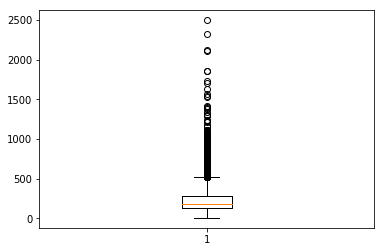

In [5]:
# Check the average review length.
lenx = [len(a) for a in x]
print('Mean: ' + str(np.mean(lenx)) + '   Standard dev: '+ str(np.std(lenx)))
plt.boxplot(lenx)
plt.show()

In [6]:
# considering the most frquent 10000 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [7]:
# from the boxplot, we can see that the number of words that most reviews have are within 500,
# so we change all the objects to 500 words, zeros are padded if less than 500
x_train  = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

#### Building the model

In [8]:
# adding embedding as the first layer of our model with output of size 'word_size'
model = Sequential()
word_size=32
model.add(Embedding(10000, word_size , input_length=500))
model.add(Flatten())
# this will convert each review into one array of size 500xword_size

# define hidden layer with relu activation function
model.add(Dense(50, activation='relu')) 
# define the output layer with sigmoid activation function
model.add(Dense(1, activation='sigmoid')) 
# using Mean Squared error as the loss function and ADAM as the update algoithm
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
# the model parameters are displayed below
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                800050    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 1,120,101
Trainable params: 1,120,101
Non-trainable params: 0
_________________________________________________________________
None


#### Fitting the model

In [9]:
# we have 25000 samples for testing. splitting the test set into validation and test
# using the first 10,000 for validation and the reamaining 15,000 for testing
x_validation= x_test[:10000]
x_test1 = x_test[10000:]
y_validation= y_test[:10000] 
y_test1 =y_test[10000:]


In [10]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=2, batch_size=128, verbose=2)
# choosing 2 epochs to avoid over-training (I have tried more than 2 epochs, but the validation accuracy goes down)
# Final evaluation of the model on a test set
scores = model.evaluate(x_test1, y_test1, verbose=0)
print("Testing Accuracy on 15000 samples: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 10000 samples
Epoch 1/2
 - 8s - loss: 0.1672 - acc: 0.7339 - val_loss: 0.0901 - val_acc: 0.8761
Epoch 2/2
 - 8s - loss: 0.0521 - acc: 0.9336 - val_loss: 0.0903 - val_acc: 0.8728
Testing Accuracy on 15000 samples: 88.01%
